In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

# Data Exploration

## Data Import

### Original data

In [2]:
oriData = pd.read_csv('data/QMData.csv')
oriData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   years         31 non-null     int64  
 1   co2           31 non-null     float64
 2   EV_stock      31 non-null     int64  
 3   GDP           31 non-null     float64
 4   Population    31 non-null     int64  
 5   renewEnergy   31 non-null     float64
 6   urbanization  31 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 1.8 KB


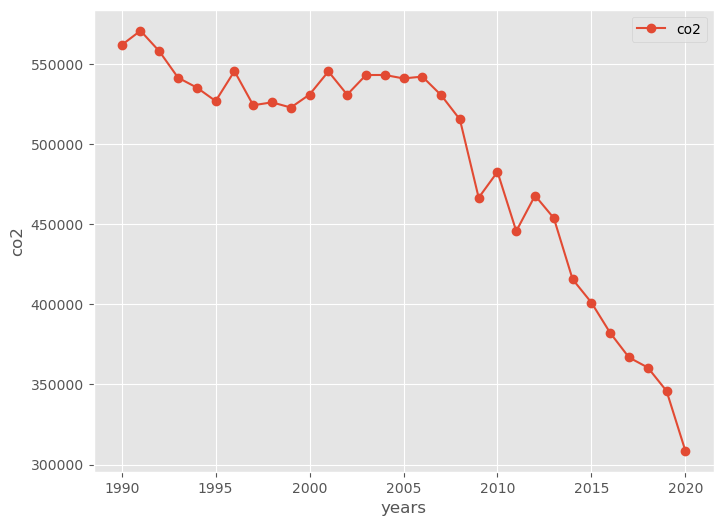

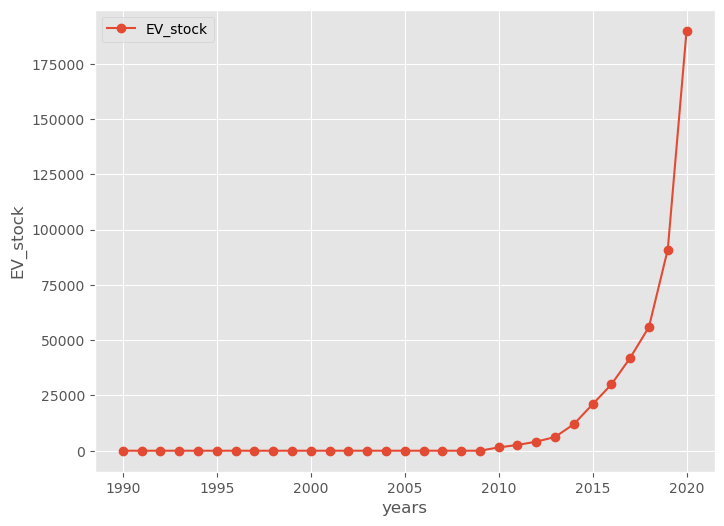

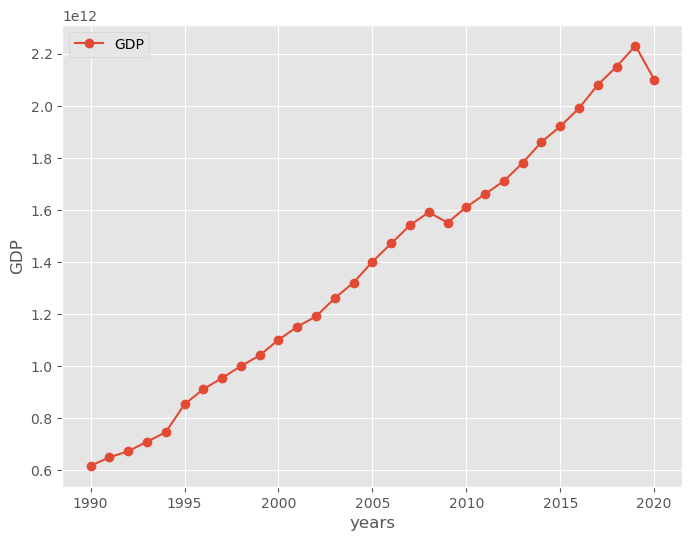

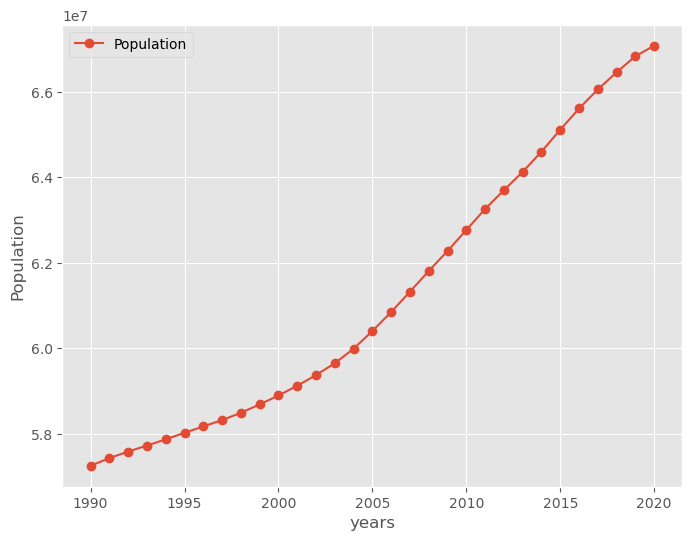

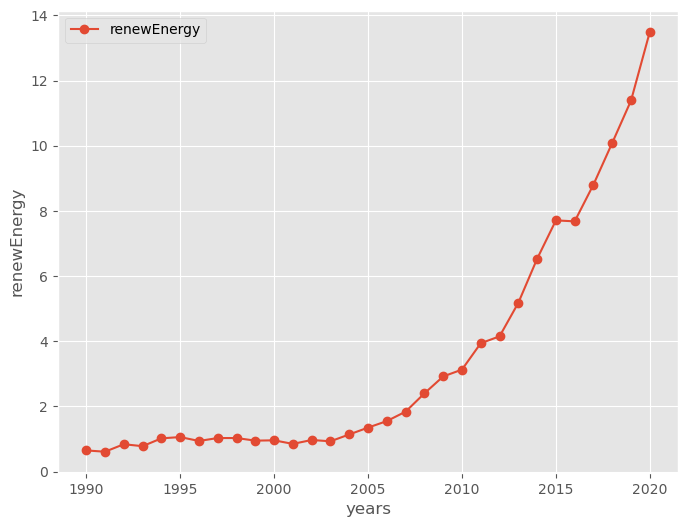

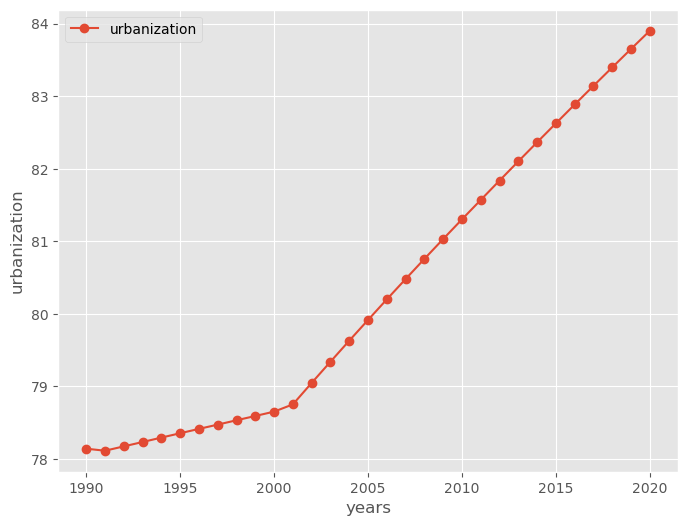

In [3]:
vaList = ['co2','EV_stock','GDP','Population','renewEnergy','urbanization']

# 创建一个数据框
df = pd.DataFrame(oriData)

# 使用for循环绘制每个数据集的折线图
for variable in vaList:
    plt.figure(figsize=(8, 6))
    plt.xlabel('years')
    plt.ylabel(variable)
    plt.plot(df['years'], df[variable], marker='o', label=variable)
    # 添加图例
    plt.legend()
    plt.show()


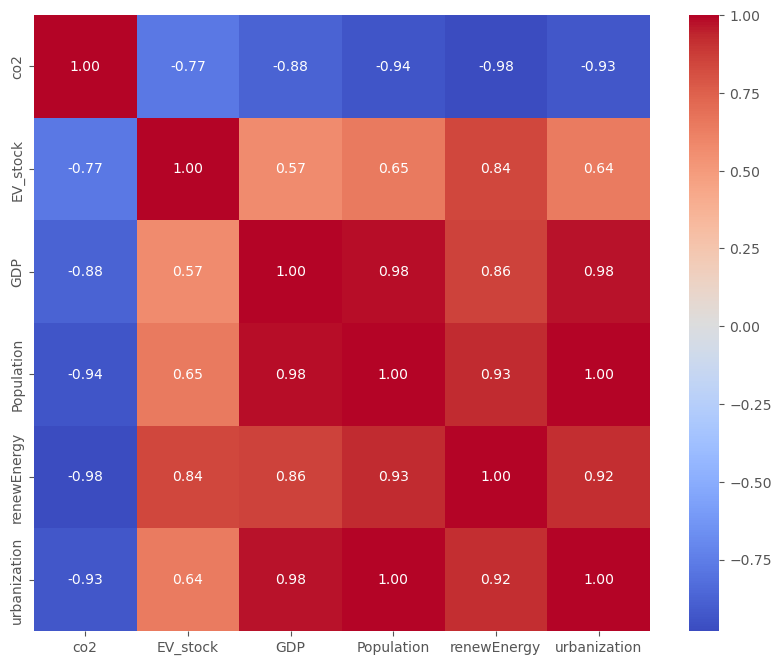

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Calculate the correlation matrix
corr = df[['co2','EV_stock','GDP','Population','renewEnergy','urbanization']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.show()

### Differential data

In [5]:
diffData_ori = pd.read_csv('data/QMData.csv')

In [6]:
vaList = ['co2','EV_stock','GDP','Population','renewEnergy','urbanization']
diffData_ori[vaList] = diffData_ori[vaList].diff().dropna()
diffData_ori.head(5)

,years,co2,EV_stock,GDP,Population,renewEnergy,urbanization
0,1990,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,"8,907.1000",0.0000,"32,000,000,000.0000","177,311.0000",-0.0400,-0.0280
2,1992,"-12,796.0000",0.0000,"24,000,000,000.0000","155,505.0000",0.2300,0.0600
3,1993,"-16,509.2000",0.0000,"36,000,000,000.0000","138,212.0000",-0.0600,0.0600
4,1994,"-6,193.2000",0.0000,"37,000,000,000.0000","147,131.0000",0.2400,0.0610


In [7]:
# 数据drop
# 设定删除的条件，例如删除 'A' 列中大于 10 的行
condition = (diffData_ori['years'] == 1990) 
# 使用 drop 方法删除满足条件的行
diffData = diffData_ori.drop(diffData_ori[condition].index)
diffData.head(5)

,years,co2,EV_stock,GDP,Population,renewEnergy,urbanization
1,1991,"8,907.1000",0.0000,"32,000,000,000.0000","177,311.0000",-0.0400,-0.0280
2,1992,"-12,796.0000",0.0000,"24,000,000,000.0000","155,505.0000",0.2300,0.0600
3,1993,"-16,509.2000",0.0000,"36,000,000,000.0000","138,212.0000",-0.0600,0.0600
4,1994,"-6,193.2000",0.0000,"37,000,000,000.0000","147,131.0000",0.2400,0.0610
5,1995,"-8,375.0000",0.0000,"107,000,000,000.0000","153,285.0000",0.0400,0.0600


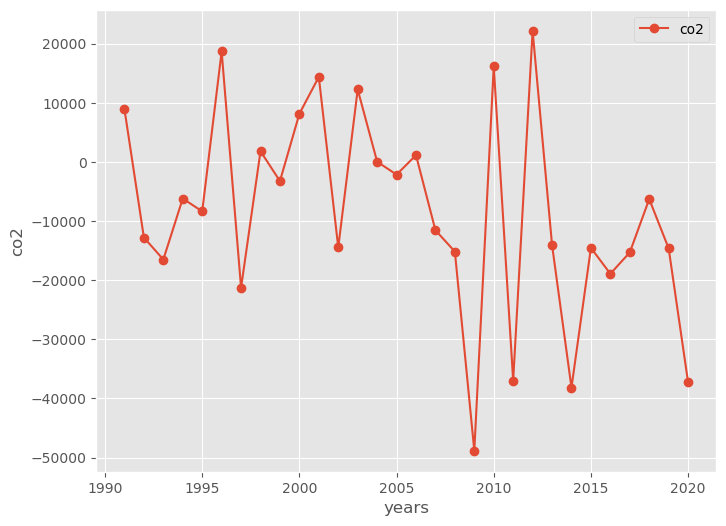

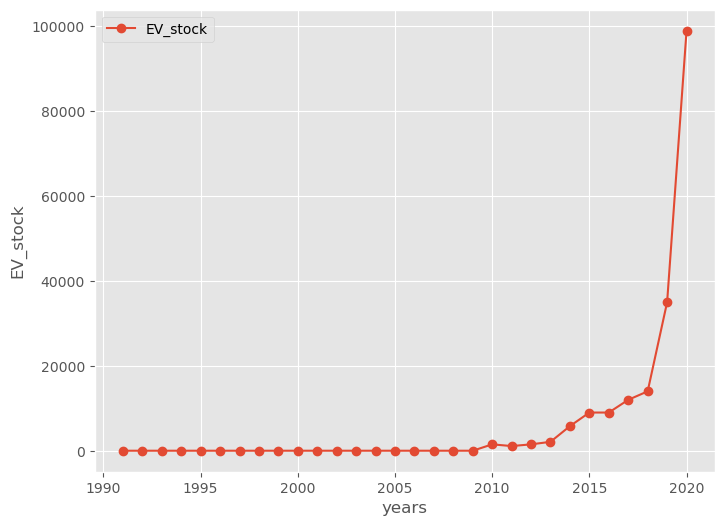

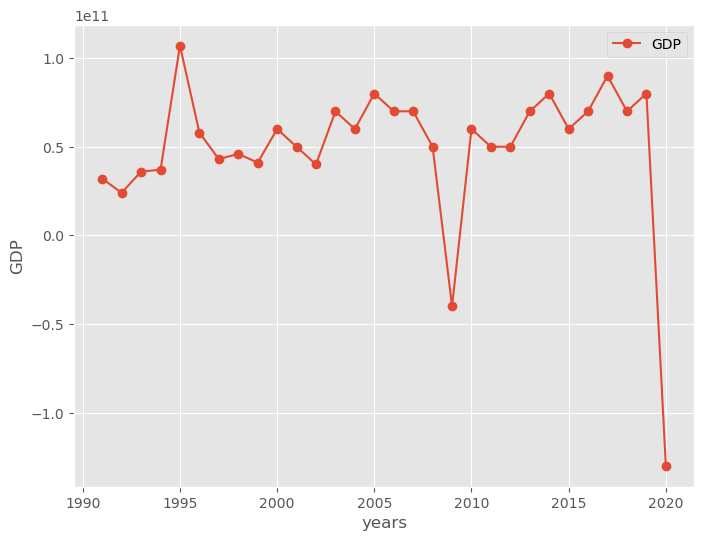

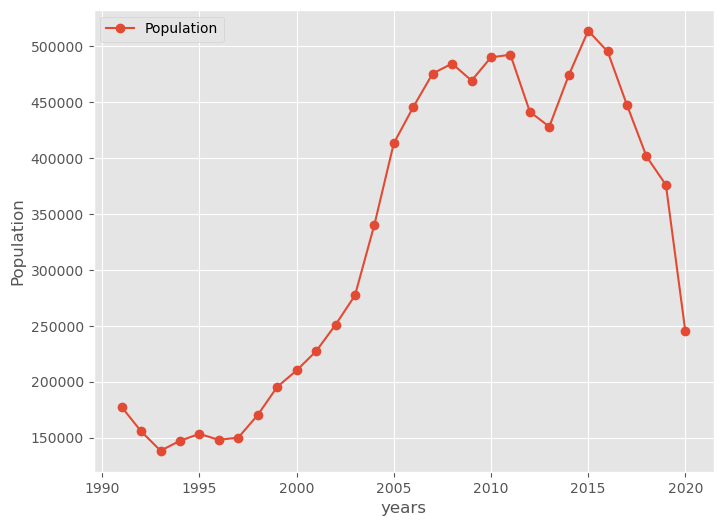

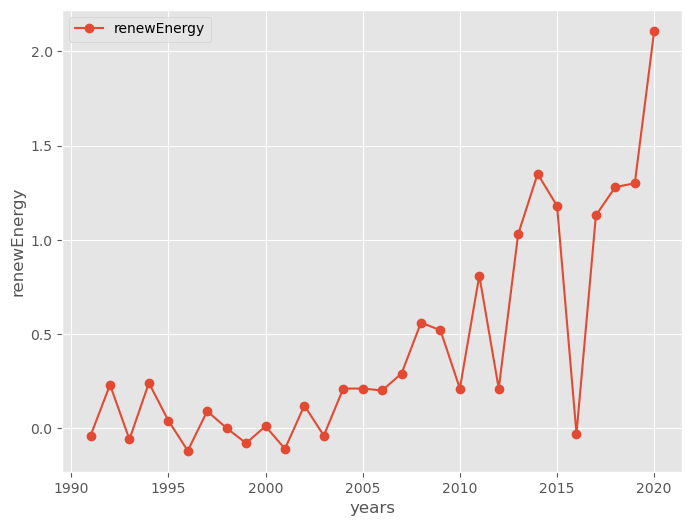

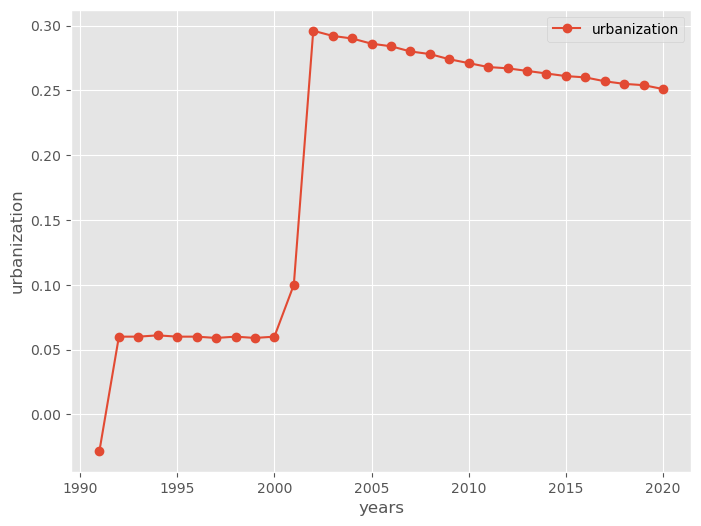

In [8]:
vaList = ['co2', 'EV_stock', 'GDP', 'Population', 'renewEnergy', 'urbanization']

# 创建一个数据框
df1 = pd.DataFrame(diffData)

# 使用for循环绘制每个数据集的折线图
for variable in vaList:
    plt.figure(figsize=(8, 6))  # 为每个变量创建一个新的图表
    plt.xlabel('years')
    plt.ylabel(variable)
    plt.plot(df1['years'], df1[variable], marker='o', label=variable)
    plt.legend()  # 添加图例
    plt.show()  # 显示图表


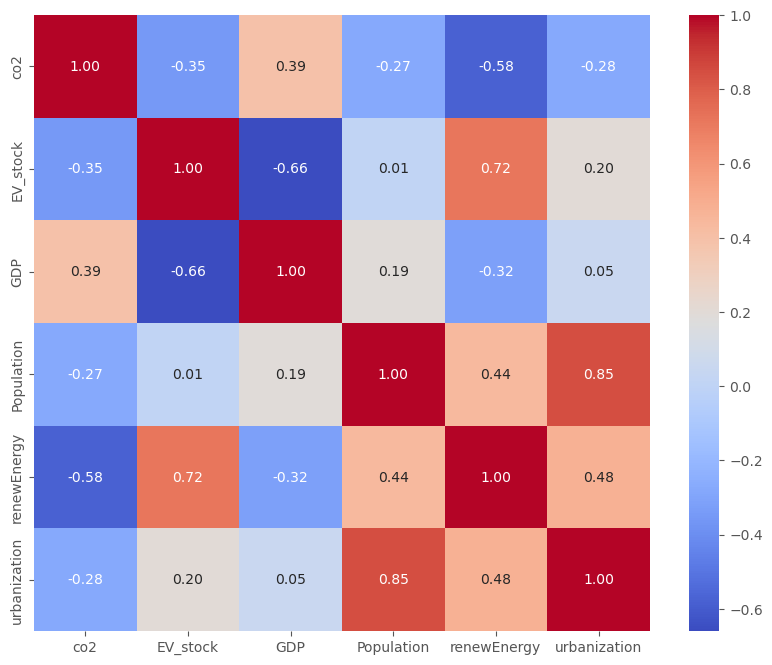

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Calculate the correlation matrix
corr = diffData[['co2','EV_stock','GDP','Population','renewEnergy','urbanization']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.show()

# Analysis

## Simple linear regression

### EV data

EV data only from 2010 to 2020

In [10]:
import statsmodels.formula.api as smf
#EV_stock
df_2010 = df[(df['years']>=2010) & (df['years']<=2020)]
dfEV_2010 = df_2010[['co2','EV_stock']]
dfEV_2010.info

<bound method DataFrame.info of                                         co2  EV_stock
20                             482,646.2000      1500
21                             445,648.4000      2600
22                             467,831.0000      4100
23                             453,778.1000      6200
24                             415,609.0000     12000
25                             401,075.3000     21000
26                             382,154.9000     30000
27                             366,844.1000     42000
28                             360,555.9000     56000
29                             345,934.3000     91000
30                             308,650.3000    190000>

In [11]:
# EV data_standardised
EV_standardised = dfEV_2010.copy()
# 创建一个 MinMaxScaler 实例
mms = MinMaxScaler()
for c in dfEV_2010.columns.values:
    EV_standardised[c] = mms.fit_transform(dfEV_2010[c].values.reshape(-1,1))
EV_standardised.head(5)

,co2,EV_stock
20,1.0000,0.0000
21,0.7874,0.0058
22,0.9149,0.0138
23,0.8341,0.0249
24,0.6147,0.0557


Regression results for EV_stock:

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     23.31
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           0.000937
Time:                        12:41:57   Log-Likelihood:                 4.5131
No. Observations:                  11   AIC:                            -5.026
Df Residuals:                       9   BIC:                            -4.230
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


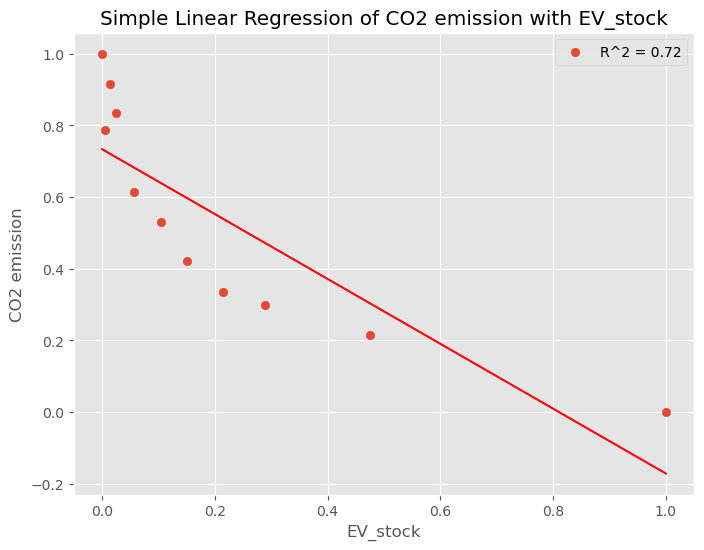

In [12]:
# plot
# coefficient : -0.9044
var = 'EV_stock'
X = sm.add_constant(EV_standardised[var])
y = EV_standardised['co2']
model = sm.OLS(y, X)
results = model.fit()
print(f"Regression results for {var}:\n")
print(results.summary())
print("\n---------------------------------\n")

# Plot the regression line and the data points
plt.figure(figsize=(8, 6))
plt.scatter(EV_standardised[var], y)
plt.plot(EV_standardised[var], results.predict(X), color='red')
plt.xlabel(var)
plt.ylabel('CO2 emission')
plt.title(f'Simple Linear Regression of CO2 emission with {var}')
r_squared = results.rsquared
plt.legend([f'R^2 = {r_squared:.2f}'])
plt.show()

### 'GDP','Population','renewEnergy','urbanization'

In [13]:
# data_standardised
df = pd.read_csv('data/QMData.csv')

mms = MinMaxScaler()
df_stand = df[['co2','GDP','Population','renewEnergy','urbanization']]
df_standardised = df_stand.copy()
for c in df_stand.columns.values:
    df_standardised[c] = mms.fit_transform(df_stand[c].values.reshape(-1,1))
df_standardised.head(5)

,co2,GDP,Population,renewEnergy,urbanization
0,0.9660,0.0000,0.0000,0.0031,0.0048
1,1.0000,0.0198,0.0180,0.0000,0.0000
2,0.9512,0.0347,0.0338,0.0178,0.0104
3,0.8882,0.0570,0.0479,0.0132,0.0207
4,0.8645,0.0799,0.0629,0.0318,0.0313


Regression results for GDP:

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     98.89
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           7.49e-11
Time:                        12:41:57   Log-Likelihood:                 18.798
No. Observations:                  31   AIC:                            -33.60
Df Residuals:                      29   BIC:                            -30.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0681  

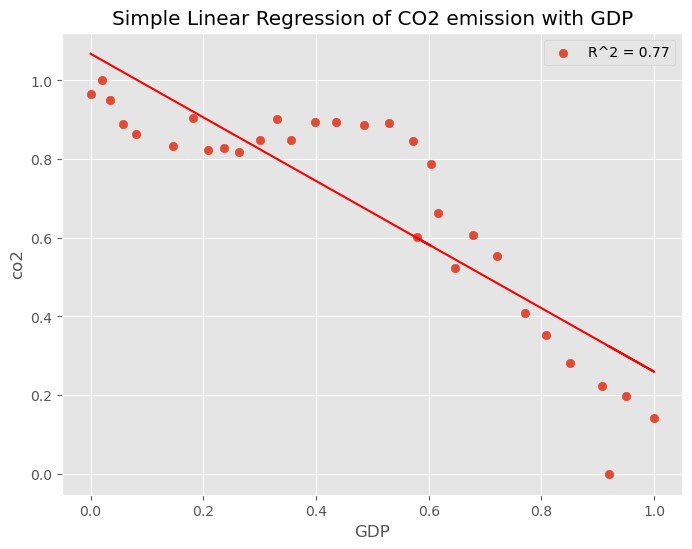

Regression results for Population:

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     222.6
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           3.85e-15
Time:                        12:41:57   Log-Likelihood:                 29.287
No. Observations:                  31   AIC:                            -54.57
Df Residuals:                      29   BIC:                            -51.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1

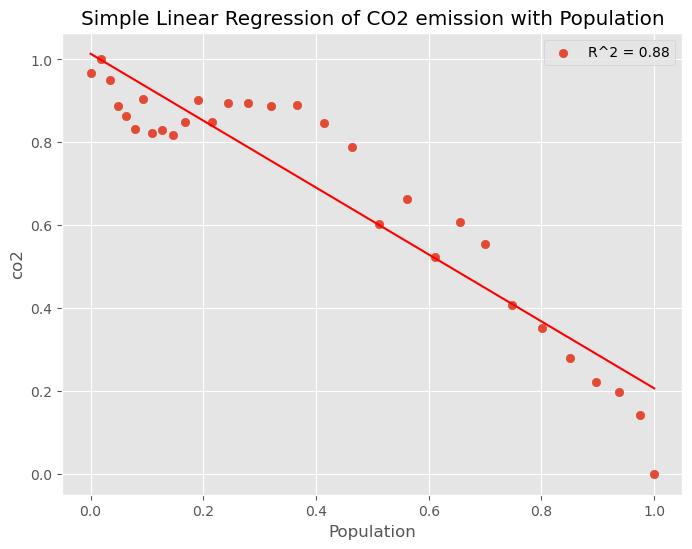

Regression results for renewEnergy:

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     703.7
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           6.90e-22
Time:                        12:41:57   Log-Likelihood:                 45.854
No. Observations:                  31   AIC:                            -87.71
Df Residuals:                      29   BIC:                            -84.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        

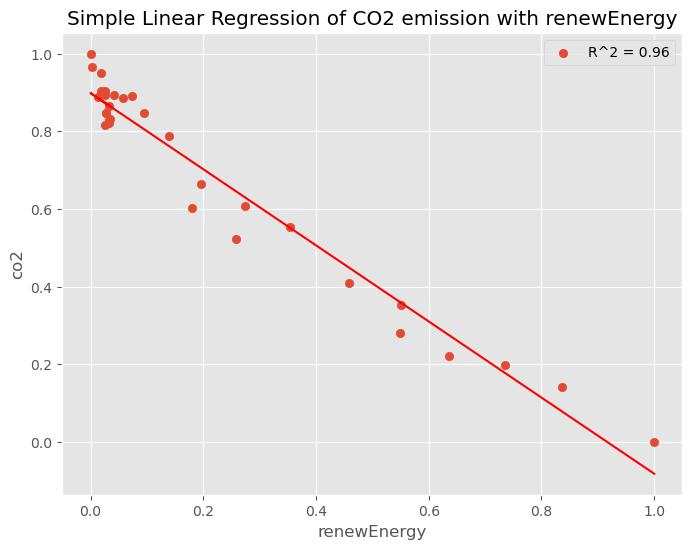

Regression results for urbanization:

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     193.6
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           2.30e-14
Time:                        12:41:58   Log-Likelihood:                 27.385
No. Observations:                  31   AIC:                            -50.77
Df Residuals:                      29   BIC:                            -47.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const     

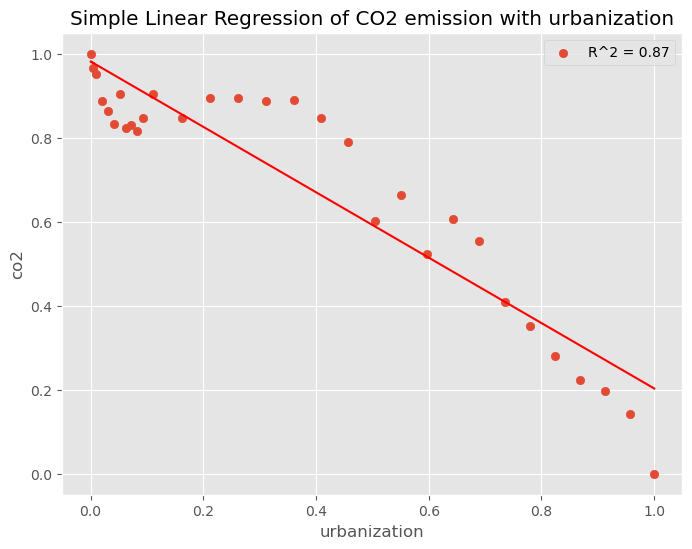

In [14]:
# List of independent variables
# -0.81, -0.81, -0.98, -0.78
variables = ['GDP','Population','renewEnergy','urbanization']
#variables = ['EV_stock','GDP','Population','renewEnergy','urbanization']
# Perform a simple linear regression for each variable
for var in variables:
    X = sm.add_constant(df_standardised[var])
    y = df_standardised['co2']
    model = sm.OLS(y, X)
    results = model.fit()
    print(f"Regression results for {var}:\n")
    print(results.summary())
    print("\n---------------------------------\n")

    # Plot the regression line and the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(df_standardised[var], y)
    plt.plot(df_standardised[var], results.predict(X), color='red')
    plt.xlabel(var)
    plt.ylabel('co2')
    plt.title(f'Simple Linear Regression of CO2 emission with {var}')
    r_squared = results.rsquared
    plt.legend([f'R^2 = {r_squared:.2f}'])
    plt.show()

## Clustering

In [15]:
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

In [16]:
GDP_CO2_Data = pd.read_csv('data/CO2_GDP_Borough.csv')
GDP_CO2_Data.head()

,LA name,GDP,CO2Emission
0,Barking and Dagenham,"4,250.0000","403,002.2900"
1,Barnet,"10,599.0000","996,594.3700"
2,Bexley,"7,294.0000","1,435,924.5700"
3,Brent,"10,434.0000","696,662.2700"
4,Bromley,"9,378.0000","804,168.4600"


In [17]:
#GDP_CO2_Data.head()
GDP_CO2 = GDP_CO2_Data.drop(columns='LA name')
GDP_CO2.head()

,GDP,CO2Emission
0,"4,250.0000","403,002.2900"
1,"10,599.0000","996,594.3700"
2,"7,294.0000","1,435,924.5700"
3,"10,434.0000","696,662.2700"
4,"9,378.0000","804,168.4600"


In [18]:
# 标准化
#['GDP','Population','renewEnergy','urbanization']
GDP_CO2 = GDP_CO2_Data[['GDP','CO2Emission']]
#dfEV_Energy = dfEV_2010[['EV_stock','renewEnergy']]
mms = MinMaxScaler()

data_standardised = GDP_CO2.copy()
for c in GDP_CO2.columns.values:
    data_standardised[c] = mms.fit_transform(GDP_CO2[c].values.reshape(-1,1))
data_standardised.head(5)

,GDP,CO2Emission
0,0.0000,0.1132
1,0.0842,0.4849
2,0.0404,0.7601
3,0.0820,0.2971
4,0.0680,0.3644


In [19]:
# 聚类
# we fix the random_state so that the kmeans result is reproducible
num_clusters = 3
random_state_seed = 100
kmeans_output = sklc.KMeans(n_clusters=num_clusters, random_state=random_state_seed).fit(data_standardised)

# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans = kmeans_output.labels_

# You can print the clustering IDs to get an ordered list of labels
print(clustering_ids_kmeans)   

[0 0 2 0 0 0 1 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
# we will combine the clustering IDs to the dataframe
GDP_CO2_Data = GDP_CO2_Data.assign(cluster_id = clustering_ids_kmeans)

#Have a look at the result:
GDP_CO2_Data.sample(5)

,LA name,GDP,CO2Emission,cluster_id
18,Islington,"21,210.0000","433,955.3300",0
31,Wandsworth,"9,093.0000","635,089.7500",0
5,Camden,"36,032.0000","714,102.6700",0
12,Hammersmith and Fulham,"12,726.0000","442,383.9900",0
19,Kensington and Chelsea,"10,817.0000","482,200.9300",0


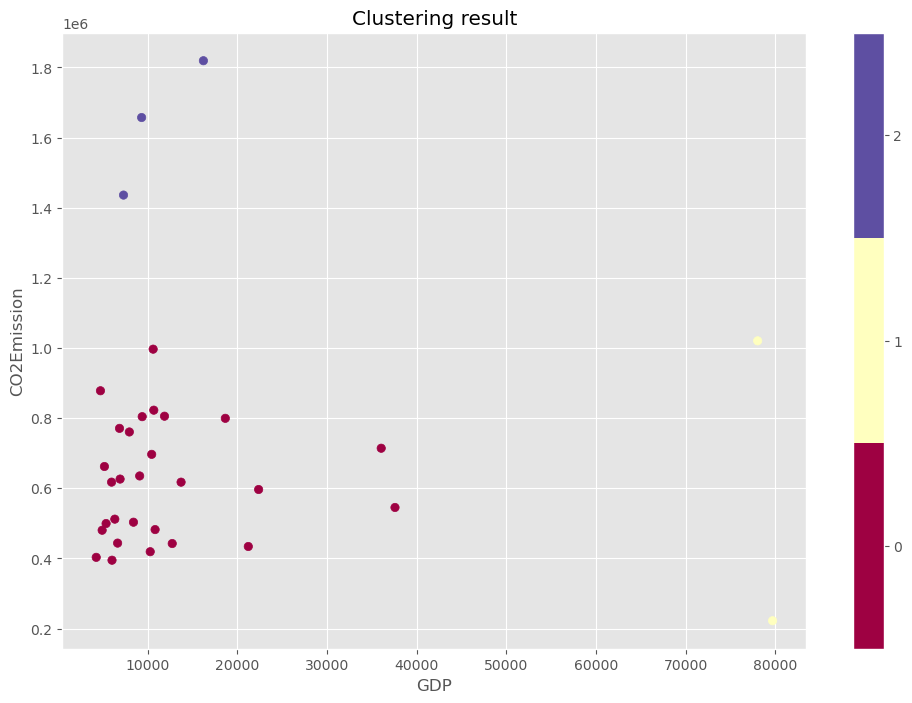

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

# number of clusters GDP_CO2_Data
n_clusters = GDP_CO2_Data.cluster_id.nunique()

# get discrete colormap
cmap = plt.get_cmap('Spectral', n_clusters)

# scatter points
scatter = ax.scatter(GDP_CO2_Data.GDP, GDP_CO2_Data.CO2Emission, c=GDP_CO2_Data.cluster_id, cmap=cmap)
ax.set_xlabel('GDP')
ax.set_ylabel('CO2Emission')
ax.set_title('Clustering result')

# add colorbar
cbar = plt.colorbar(scatter)

# set ticks locations (not very elegant, but it works):
# - shift by 0.5
# - scale so that the last value is at the center of the last color
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cbar.set_ticks(tick_locs)

# set tick labels (as before)
cbar.set_ticklabels(np.arange(n_clusters))

## Differential data analysis

### Differential EV 

In [22]:
import statsmodels.formula.api as smf
#EV_stock
diffEV_2010 = diffData[(diffData['years']>=2010) & (diffData['years']<=2020)]
diffEV_2010.head(5)

,years,co2,EV_stock,GDP,Population,renewEnergy,urbanization
20,2010,"16,153.7000","1,500.0000","60,000,000,000.0000","490,095.0000",0.2100,0.2710
21,2011,"-36,997.8000","1,100.0000","50,000,000,000.0000","492,445.0000",0.8100,0.2680
22,2012,"22,182.6000","1,500.0000","50,000,000,000.0000","441,405.0000",0.2100,0.2670
23,2013,"-14,052.9000","2,100.0000","70,000,000,000.0000","428,058.0000",1.0300,0.2650
24,2014,"-38,169.1000","5,800.0000","80,000,000,000.0000","474,025.0000",1.3500,0.2630


In [23]:
# EV data_standardised
diffEV_standardised = diffEV_2010.copy()
for c in diffEV_2010.columns.values:
    diffEV_standardised[c] = mms.fit_transform(diffEV_2010[c].values.reshape(-1,1))
diffEV_standardised.head(5)

,years,co2,EV_stock,GDP,Population,renewEnergy,urbanization
20,0.0000,0.9001,0.0041,0.8636,0.9114,0.1121,1.0000
21,0.1000,0.0194,0.0000,0.8182,0.9202,0.3925,0.8500
22,0.2000,1.0000,0.0041,0.8182,0.7304,0.1121,0.8000
23,0.3000,0.3996,0.0102,0.9091,0.6808,0.4953,0.7000
24,0.4000,0.0000,0.0480,0.9545,0.8517,0.6449,0.6000


Regression results for EV_stock:

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.700
Date:                Fri, 05 Jul 2024   Prob (F-statistic):              0.225
Time:                        12:41:58   Log-Likelihood:                -1.9258
No. Observations:                  11   AIC:                             7.852
Df Residuals:                       9   BIC:                             8.647
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


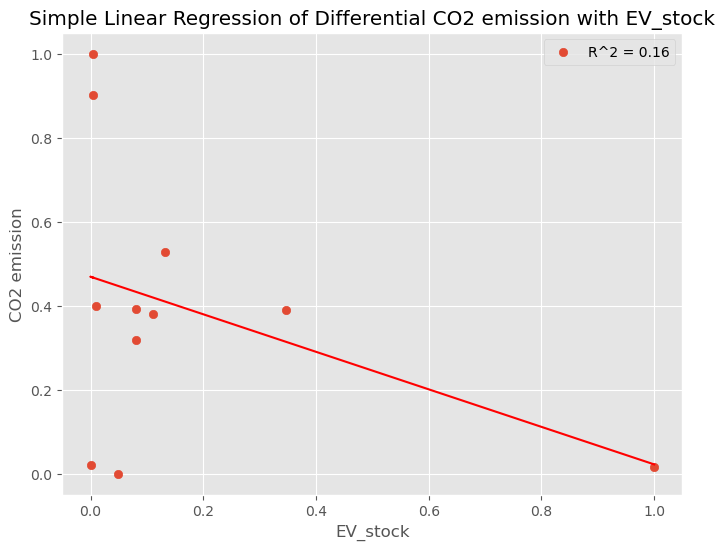

In [24]:
# plot
var = 'EV_stock'
X = sm.add_constant(diffEV_standardised[var])
y = diffEV_standardised['co2']
model = sm.OLS(y, X)
results = model.fit()
print(f"Regression results for {var}:\n")
print(results.summary())
print("\n---------------------------------\n")

# Plot the regression line and the data points
plt.figure(figsize=(8, 6))
plt.scatter(diffEV_standardised[var], y)
plt.plot(diffEV_standardised[var], results.predict(X), color='red')
plt.xlabel(var)
plt.ylabel('CO2 emission')
plt.title(f'Simple Linear Regression of Differential CO2 emission with {var}')
r_squared = results.rsquared
plt.legend([f'R^2 = {r_squared:.2f}'])
plt.show()

### Differential {'GDP','Population','renewEnergy','urbanization'}

In [25]:
diffData.head()

,years,co2,EV_stock,GDP,Population,renewEnergy,urbanization
1,1991,"8,907.1000",0.0000,"32,000,000,000.0000","177,311.0000",-0.0400,-0.0280
2,1992,"-12,796.0000",0.0000,"24,000,000,000.0000","155,505.0000",0.2300,0.0600
3,1993,"-16,509.2000",0.0000,"36,000,000,000.0000","138,212.0000",-0.0600,0.0600
4,1994,"-6,193.2000",0.0000,"37,000,000,000.0000","147,131.0000",0.2400,0.0610
5,1995,"-8,375.0000",0.0000,"107,000,000,000.0000","153,285.0000",0.0400,0.0600


In [26]:
# data_standardised
# diffData
mms = MinMaxScaler()
diff_stand = diffData[['co2','GDP','Population','renewEnergy','urbanization']]
diff_standardised = diff_stand.copy()
for c in diff_stand.columns.values:
    diff_standardised[c] = mms.fit_transform(diff_stand[c].values.reshape(-1,1))
diff_standardised.head(5)

,co2,GDP,Population,renewEnergy,urbanization
1,0.8131,0.6835,0.1041,0.0359,0.0000
2,0.5075,0.6498,0.0460,0.1570,0.2716
3,0.4552,0.7004,0.0000,0.0269,0.2716
4,0.6005,0.7046,0.0237,0.1614,0.2747
5,0.5698,1.0000,0.0401,0.0717,0.2716


Regression results for GDP:

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     5.156
Date:                Fri, 05 Jul 2024   Prob (F-statistic):             0.0311
Time:                        12:41:58   Log-Likelihood:                 2.4440
No. Observations:                  30   AIC:                           -0.8880
Df Residuals:                      28   BIC:                             1.914
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1584  

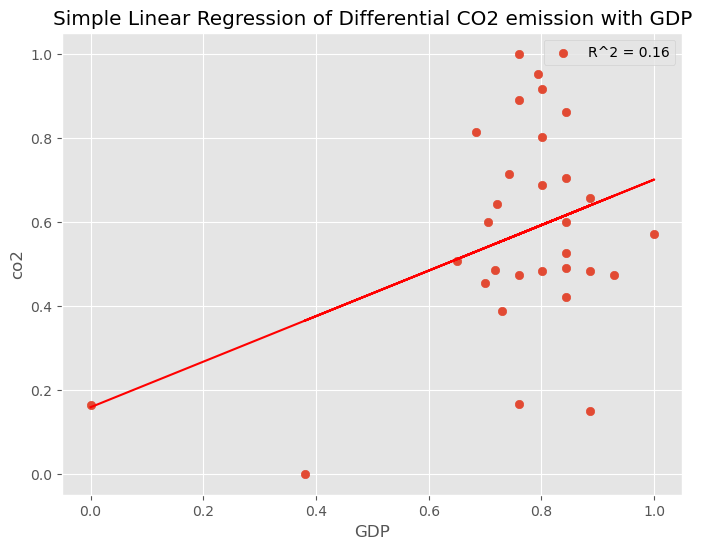

Regression results for Population:

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.285
Date:                Fri, 05 Jul 2024   Prob (F-statistic):              0.142
Time:                        12:41:58   Log-Likelihood:                 1.0855
No. Observations:                  30   AIC:                             1.829
Df Residuals:                      28   BIC:                             4.631
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

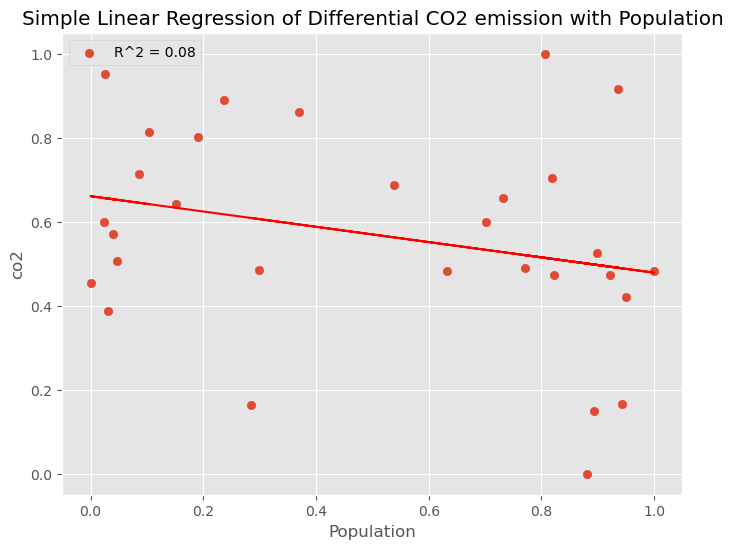

Regression results for renewEnergy:

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     13.98
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           0.000843
Time:                        12:41:59   Log-Likelihood:                 5.9824
No. Observations:                  30   AIC:                            -7.965
Df Residuals:                      28   BIC:                            -5.162
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        

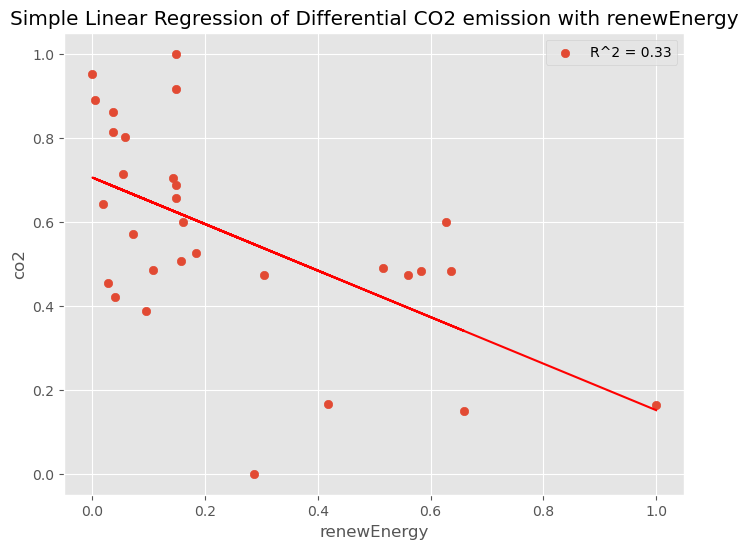

Regression results for urbanization:

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.298
Date:                Fri, 05 Jul 2024   Prob (F-statistic):              0.141
Time:                        12:41:59   Log-Likelihood:                 1.0918
No. Observations:                  30   AIC:                             1.816
Df Residuals:                      28   BIC:                             4.619
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const     

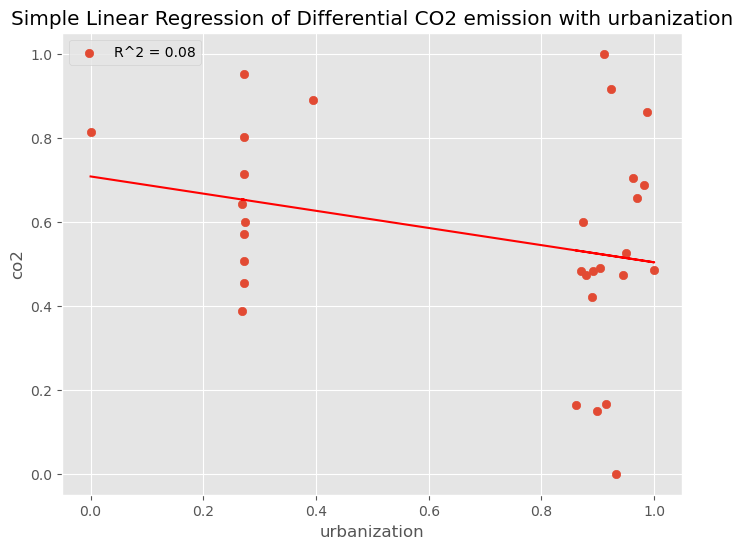

In [27]:
# List of independent variables
variables = ['GDP','Population','renewEnergy','urbanization']
#variables = ['EV_stock','GDP','Population','renewEnergy','urbanization']
# Perform a simple linear regression for each variable
for var in variables:
    X = sm.add_constant(diff_standardised[var])
    y = diff_standardised['co2']
    model = sm.OLS(y, X)
    results = model.fit()
    print(f"Regression results for {var}:\n")
    print(results.summary())
    print("\n---------------------------------\n")

    # Plot the regression line and the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(diff_standardised[var], y)
    plt.plot(diff_standardised[var], results.predict(X), color='red')
    plt.xlabel(var)
    plt.ylabel('co2')
    plt.title(f'Simple Linear Regression of Differential CO2 emission with {var}')
    r_squared = results.rsquared
    plt.legend([f'R^2 = {r_squared:.2f}'])
    plt.show()